In [2]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

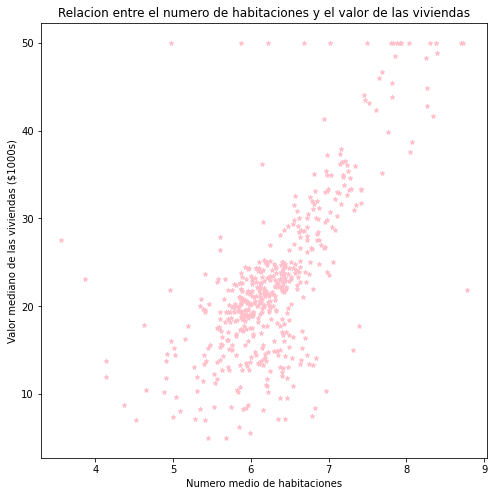

In [4]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink", figsize=(8,8))
plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [5]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,8)

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

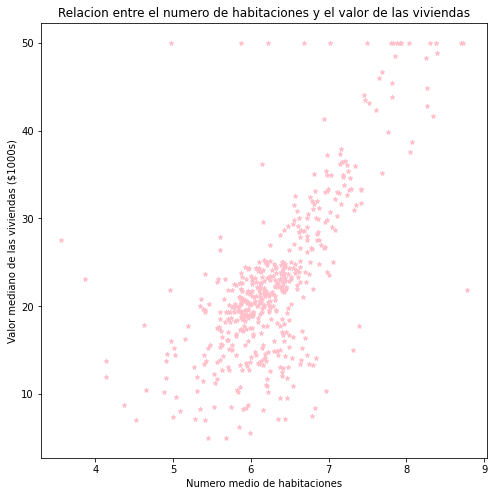

In [6]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

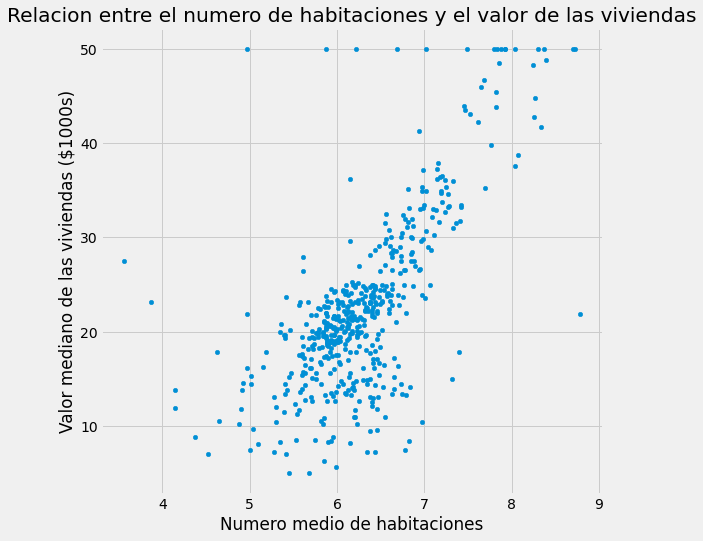

In [7]:
plt.style.use("fivethirtyeight")
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [8]:
from ipywidgets import interact


In [9]:
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y="VALOR_MEDIANO")
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

<AxesSubplot:xlabel='LON', ylabel='LAT'>

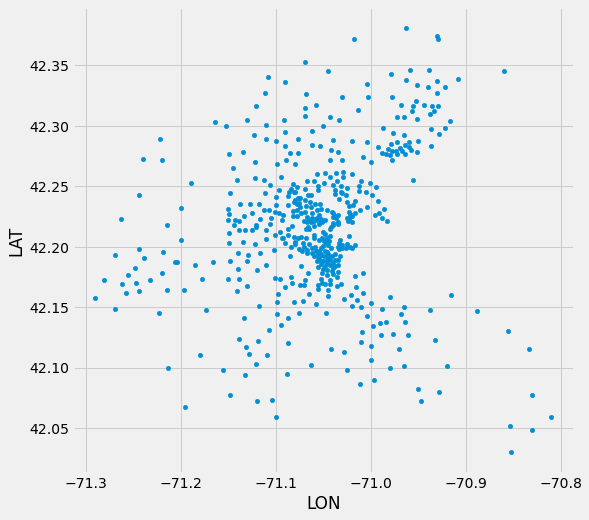

In [10]:
df.plot.scatter(x="LON", y="LAT")

In [11]:
import cartopy.crs as ccrs

from cartopy.io import img_tiles

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
df.VALOR_MEDIANO.plot.kde()

In [ ]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
primer_quintil

In [ ]:
cuarto_quintil = df.VALOR_MEDIANO.quantile(0.8)
cuarto_quintil

In [12]:
imagery = img_tiles.GoogleTiles()
ax = plt.axes(projection=imagery.crs)
limites_mapa = (-71.38 ,-70.77,42.03 , 42.47)
ax.set_extent(limites_mapa)
ax.add_image(imagery, 10)
df_primer_qt = df[df.VALOR_MEDIANO<primer_quintil]
df_tercer_qt = df[df.VALOR_MEDIANO>cuarto_quintil]
plt.plot(df_primer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="red", linewidth=0, alpha=0.5)
plt.plot(df_tercer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="green", linewidth=0, alpha=0.5)
plt.show()

NameError: name 'img_tiles' is not defined

In [13]:
import seaborn as sns

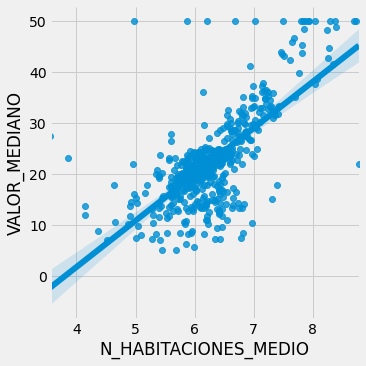

In [14]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df)

<AxesSubplot:>

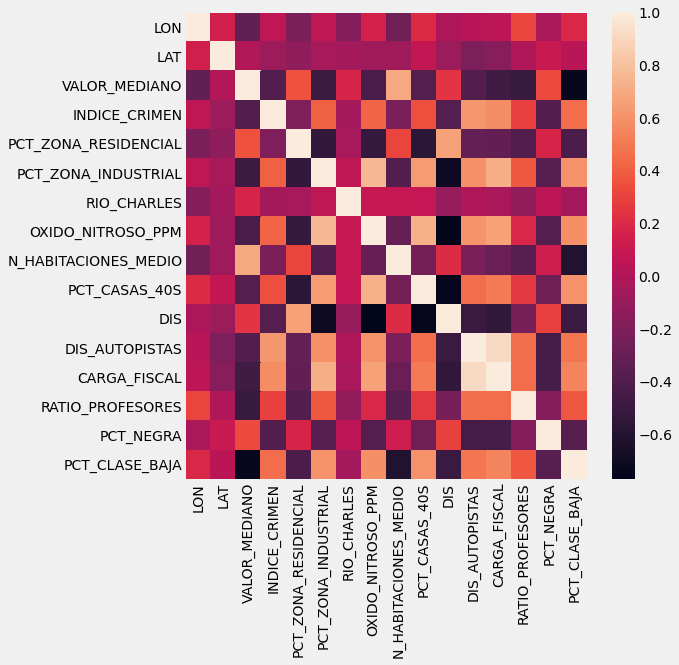

In [15]:
sns.heatmap(df.corr())

In [16]:
import bokeh.plotting as bk

bk.output_notebook()

Loading BokehJS ...

In [17]:
df["CRIMEN_QUINTIL"] = pd.qcut(df.INDICE_CRIMEN, 5)

In [18]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]],
              closed='right',
              dtype='interval[float64]')

In [19]:
from bokeh.palettes import brewer

colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

('#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c')

In [20]:
p = bk.figure(
plot_width=600,
    plot_height=600,
    title="Habitaciones vs Valor vivienda vs crimen"
)
for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
    df_q = df[df.CRIMEN_QUINTIL==quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, color=colors[i],
             legend="({}-{})".format(quintil.left, quintil.right)
             )
bk.show(p);



<AxesSubplot:ylabel='Frequency'>

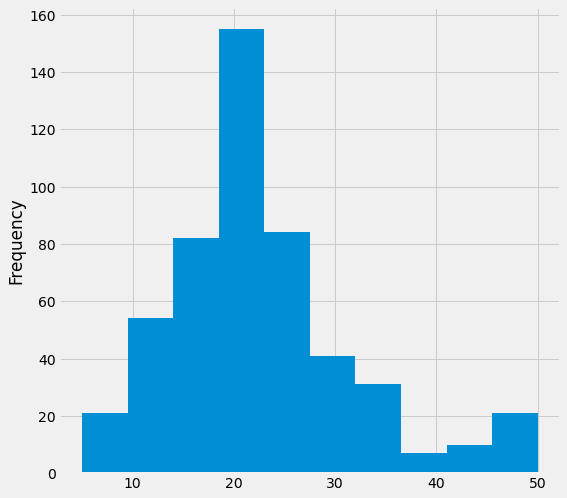

In [21]:
df.VALOR_MEDIANO.plot.hist()

In [23]:
import numpy as np
hist, edges = np.histogram(df.VALOR_MEDIANO, bins=20)

In [24]:
hist

array([ 9, 12, 18, 36, 41, 41, 84, 71, 72, 12, 23, 18, 17, 14,  6,  1,  5,
        5,  2, 19], dtype=int64)

In [25]:
edges

array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
       25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
       45.5 , 47.75, 50.  ])

In [26]:
p1 = bk.figure(title="Histograma valor viviendas", tools="save,hover", background_fill_color="#E8DDCB")
p1.quad(top=hist,bottom=0, left=edges[:-1], right=edges[1:], fill_color="#026560")
bk.show(p1)

In [27]:
from altair import Chart, Color, Scale

ModuleNotFoundError: No module named 'altair'

In [28]:
chart = Chart(df)
scale = Scale(range=['#996666', '#b34d4d', '#cc3333','#e61919','#ff0000'])
chart.mark_point().encode(
x="N_HABITACIONES_MEDIO",
    y="VALOR_MEDIANO",
    color=Color("CRIMEN_QUINTIL", scale=scale)

SyntaxError: unexpected EOF while parsing (<ipython-input-28-c5f88261d7a2>, line 6)